In [1]:
import hyperopt
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
pd.options.display.precision = 4
pd.options.mode.chained_assignment = None  

# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
set_config(display="diagram")

2023-09-13 23:22:00.232143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 23:22:00.422421: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 23:22:00.424251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 23:22:01.679275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv('./data/spaceship/train.csv')
test = pd.read_csv('./data/spaceship/test.csv')

In [3]:
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
test.head(20)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S
5,Earth,False,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,F,P
6,Europa,True,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,B,P
7,Europa,True,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,D,S
8,Europa,True,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,D,S
9,Earth,False,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,F,S


In [4]:
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])
train.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)


In [5]:
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

In [6]:
na_cols=train.columns[train.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


Text(0.5, 1.0, 'Heatmap of missing values')

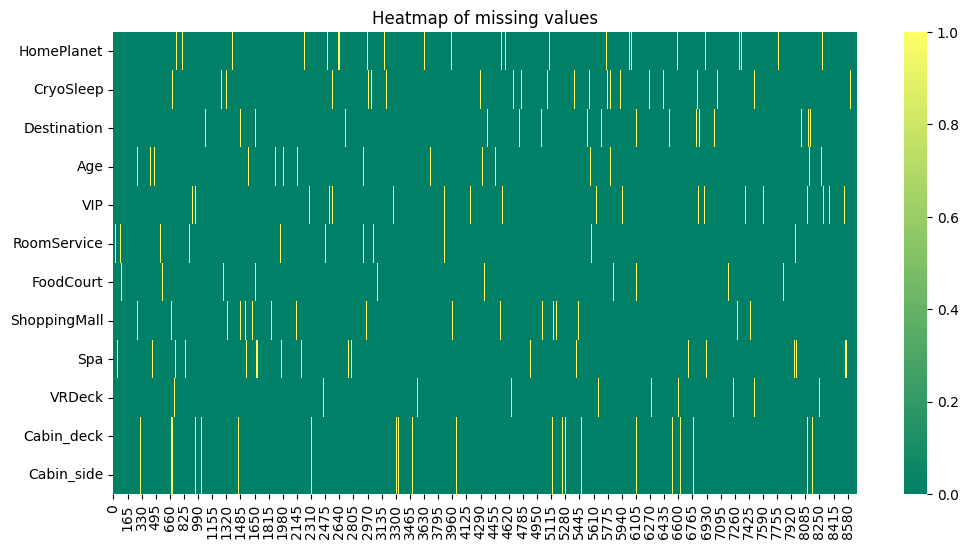

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

In [7]:

df = train.copy()#.drop('Transported', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_deck    8494 non-null   object 
 12  Cabin_side    8494 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [9]:
SEED = 42
TARGET = 'Transported'
FEATURES = df.columns.drop(TARGET)

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
Categorical features: Cabin_deck, Cabin_side, CryoSleep, Destination, HomePlanet, VIP


In [102]:
# Impute numerical variables with mean
df_num_imputed = df[NUMERICAL].fillna(df[NUMERICAL].mean())
# Normalise numerical variables
df_num_scaled = df_num_imputed.subtract(df_num_imputed.min(), axis=1)\
                              .divide(df_num_imputed.max()-df_num_imputed.min(), axis=1)

# Impute categorical variables with a constant
df_cat_imputed = df[CATEGORICAL].fillna('missing')
# One-hot-encode categorical variables
df_cat_encoded = pd.get_dummies(df_cat_imputed, drop_first=False)

# Merge data
df_preprocessed = df_num_scaled.join(df_cat_encoded)
df_preprocessed.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_missing,VIP_False,VIP_True,VIP_missing
0,0.4937,0.0000,0.0000e+00,0.0000,0.0000e+00,0.0000e+00,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,0.3038,0.0076,3.0188e-04,0.0011,2.4500e-02,1.8232e-03,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
2,0.7342,0.0030,1.1995e-01,0.0000,2.9967e-01,2.0304e-03,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
3,0.4177,0.0000,4.3035e-02,0.0158,1.4856e-01,7.9973e-03,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,0.2025,0.0211,2.3480e-03,0.0064,2.5214e-02,8.2874e-05,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
5,0.5570,0.0000,1.6201e-02,0.0000,1.2986e-02,0.0000e+00,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
6,0.3291,0.0029,5.1622e-02,0.0001,0.0000e+00,0.0000e+00,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
7,0.3544,0.0000,0.0000e+00,0.0000,0.0000e+00,1.2632e-02,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
8,0.4430,0.0000,2.6331e-02,0.0007,9.6394e-03,0.0000e+00,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
9,0.1772,0.0000,0.0000e+00,0.0000,0.0000e+00,0.0000e+00,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [10]:
df = train.copy()

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=TARGET), df[TARGET], 
                                                    test_size=.2, random_state=SEED, 
                                                    stratify=df[TARGET])




num_imputer = SimpleImputer(strategy='mean')
train_num_imputed = num_imputer.fit_transform(x_train[NUMERICAL])

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num_imputed)

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
train_cat_imputed = cat_imputer.fit_transform(x_train[CATEGORICAL])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
train_cat_encoded = encoder.fit_transform(train_cat_imputed)

train_preprocessed = np.concatenate((train_num_scaled, train_cat_encoded), axis=1)

columns = np.append(NUMERICAL, encoder.get_feature_names_out(CATEGORICAL))
pd.DataFrame(train_preprocessed, columns=columns, index=x_train.index).head()

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['bool', 'str']

In [134]:
df = train.copy()
df = df.dropna()

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=TARGET), df[TARGET], 
                                                    test_size=.2, random_state=SEED, 
                                                    stratify=df[TARGET])




num_imputer = SimpleImputer(strategy='mean')
train_num_imputed = num_imputer.fit_transform(x_train[NUMERICAL])
test_num_imputed = num_imputer.transform(x_test[NUMERICAL])

scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num_imputed)
test_num_scaled = scaler.transform(test_num_imputed)

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
train_cat_imputed = cat_imputer.fit_transform(x_train[CATEGORICAL])
test_cat_imputed = cat_imputer.transform(x_test[CATEGORICAL])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
train_cat_encoded = encoder.fit_transform(train_cat_imputed)
test_cat_encoded = encoder.transform(test_cat_imputed)

train_preprocessed = np.concatenate((train_num_scaled, train_cat_encoded), axis=1)
test_preprocessed = np.concatenate((test_num_scaled, test_cat_encoded), axis=1)

columns = np.append(NUMERICAL, encoder.get_feature_names_out(CATEGORICAL))
pd.DataFrame(train_preprocessed, columns=columns, index=x_train.index).head()

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars,VIP_True
5339,0.1899,0.0000,0.0000,0.0414,0.0013,0.0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
261,0.3544,0.0000,0.0197,0.0014,0.0003,0.0718,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7412,0.4937,0.3054,0.0026,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1881,0.3924,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6464,0.1899,0.0000,0.0178,0.0012,0.0000,0.0080,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
model = LogisticRegression()
model.fit(train_preprocessed, y_train)

LogisticRegression()

In [24]:
def calculate_roc_auc(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba)

In [14]:
test_num_imputed = num_imputer.transform(x_test[NUMERICAL])
test_num_scaled = scaler.transform(test_num_imputed)
test_cat_imputed = cat_imputer.transform(x_test[CATEGORICAL])
test_cat_encoded = encoder.transform(test_cat_imputed)
test_preprocessed = np.concatenate((test_num_scaled, test_cat_encoded), axis=1)

print(f"Train ROC-AUC: {calculate_roc_auc(model, train_preprocessed, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(model, test_preprocessed, y_test):.4f}")

Train ROC-AUC: 0.8592
Test ROC-AUC: 0.8407


In [15]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LogisticRegression())
])

pipe.fit(x_train, y_train)

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [16]:
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, x_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, x_test, y_test):.4f}")

Train ROC-AUC: 0.8592
Test ROC-AUC: 0.8407


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, random_state=42))
])

pipe.fit(x_train, y_train)

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, n_estimators=10,
                                            random_state=42))])

In [26]:
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, x_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, x_test, y_test):.4f}")

Train ROC-AUC: 0.8469
Test ROC-AUC: 0.8283


In [29]:
import xgboost as xgb

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 5))
])

pipe.fit(x_train, y_train)
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, x_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, x_test, y_test):.4f}")

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train ROC-AUC: 0.8869
Test ROC-AUC: 0.8667


In [73]:
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, features, method='constant', value='missing'):
        self.features = features
        self.method = method
        self.value = value
    
    def fit(self, X, y=None):
        if self.method=='mean':
            self.value = X[self.features].mean()
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = X[self.features].fillna(self.value)
        return X_transformed
    
class Scaler(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        self.min = X[self.features].min()
        self.range = X[self.features].max()-self.min
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = (X[self.features]-self.min)/self.range
        return X_transformed
  
class Encoder(BaseEstimator, TransformerMixin):
    def __init__(self, features, drop='first'):
        self.features = features
        self.drop = drop
    
    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse=False, drop=self.drop)
        self.encoder.fit(X[self.features])
        return self
    
    def transform(self, X):
        X_transformed = pd.concat([X.drop(columns=self.features).reset_index(drop=True), 
                                   pd.DataFrame(self.encoder.transform(X[self.features]), 
                                                columns=self.encoder.get_feature_names_out(self.features))], axis=1)
        return X_transformed
        
pipe = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    ('model', LogisticRegression())
])

pipe.fit(x_train, y_train)   

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('num_imputer',
                 Imputer(features=Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'),
                         method='mean',
                         value=Age              29.0155
RoomService     223.5254
FoodCourt       484.5862
ShoppingMall    180.8329
Spa             323.2144
VRDeck          315.1421
dtype: float64)),
                ('scaler',
                 Scaler(features=Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'))),
                ('cat_imputer',
                 Imputer(features=Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))),
                ('encoder',
                 Encoder(features=Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))),
                ('model', LogisticRegression())])

In [74]:
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, x_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, x_test, y_test):.4f}")

Train ROC-AUC: 0.8592
Test ROC-AUC: 0.8407


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

class LogisticRegressionTuner(BaseEstimator, TransformerMixin):
    def __init__(self, param_grid=None, cv=3):
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y=None):
        self.model = LogisticRegression()
        self.grid_search = GridSearchCV(self.model, self.param_grid, cv=self.cv)
        self.grid_search.fit(X, y)
        return self
    
    def transform(self, X):
        # LogisticRegressionTuner не изменяет данные, поэтому просто возвращаем X
        return X

# Определите сетку параметров, которые вы хотите оптимизировать для LogisticRegression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Добавьте LogisticRegressionTuner в ваш конвейер
pipe = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    ('logistic_regression_tuner', LogisticRegressionTuner(param_grid=param_grid, cv=3)),
    ('model', LogisticRegression())  # Добавьте оптимизированную модель
])

# Запустите конвейер на тренировочных данных
pipe.fit(x_train, y_train)
print(pipe.score(x_test,y_test))


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

0.7642276422764228


/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, x_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, x_test, y_test):.4f}")

Train ROC-AUC: 0.8592
Test ROC-AUC: 0.8407


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder



class GBCTuner(BaseEstimator, TransformerMixin):
    def __init__(self, param_grid=None, cv=3):
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y=None):
        self.model = GradientBoostingClassifier()
        self.grid_search = GridSearchCV(self.model, self.param_grid, cv=self.cv)
        self.grid_search.fit(X, y)
        return self
    
    def transform(self, X):
        return X

# Определите сетку параметров, которые вы хотите оптимизировать для LogisticRegression
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    #'penalty': ['l2']
    'n_estimators': [5, 8, 10],
    'random_state': [0, 42]
}

# Добавьте LogisticRegressionTuner в ваш конвейер
pipe = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    #('encoder_fit', Encoder(CATEGORICAL).transform),
    ('GBCtuner', GBCTuner(param_grid=param_grid, cv=3)),
    ('model', GradientBoostingClassifier())  # Добавьте оптимизированную модель
])

# Запустите конвейер на тренировочных данных
pipe.fit(x_train, y_train)
#print(pipe.score(x_test,y_test))


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('num_imputer',
                 Imputer(features=Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'),
                         method='mean',
                         value=Age              29.0155
RoomService     223.5254
FoodCourt       484.5862
ShoppingMall    180.8329
Spa             323.2144
VRDeck          315.1421
dtype: float64)),
                ('scaler',
                 Scaler(features=Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VR...
                 Imputer(features=Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))),
                ('encoder',
                 Encoder(features=Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))),
                ('GBCtuner',
                 GBCTuner(param_grid={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                        10],
                                      'n_estimators': [5, 8, 10],
                                      'random_state': [0, 42]})),
                ('model', GradientBoostingClassifier())])

In [78]:
print(f"Train ROC-AUC: {calculate_roc_auc(pipe, x_train, y_train):.4f}")
print(f"Test ROC-AUC: {calculate_roc_auc(pipe, x_test, y_test):.4f}")

Train ROC-AUC: 0.9158
Test ROC-AUC: 0.8802


In [132]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side
5339,Earth,False,TRAPPIST-1e,15.0,False,0.0,0.0,973.0,29.0,0.0,F,S
261,Europa,False,TRAPPIST-1e,28.0,False,0.0,587.0,32.0,6.0,1460.0,B,P
7412,Earth,False,TRAPPIST-1e,39.0,False,3030.0,79.0,0.0,0.0,0.0,F,S
1881,Europa,False,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,B,P
6464,Earth,False,TRAPPIST-1e,15.0,False,0.0,532.0,29.0,0.0,163.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
5916,Mars,True,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,F,S
4809,Earth,True,PSO J318.5-22,24.0,False,0.0,0.0,0.0,0.0,0.0,G,P
4143,Europa,False,55 Cancri e,39.0,False,3.0,83.0,0.0,805.0,2983.0,D,S
7994,Earth,False,PSO J318.5-22,58.0,False,487.0,0.0,195.0,0.0,7.0,E,P


In [136]:
import tensorflow as tf
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix
import seaborn as sns

class NeuralNetworkTrainer(BaseEstimator, TransformerMixin):
    def __init__(self, epochs=10, batch_size=32, verbose=1):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None
    
    def fit(self, X, y=None):
        input_shape = (X.shape[1],)  # Определите форму входных данных на основе X
        num_classes = len(np.unique(y))  # Количество классов в задаче классификации
        
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(1024, activation='tanh', input_shape=input_shape),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(512, activation='tanh'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.model = model
        return self
    
    def transform(self, X):
        # NeuralNetworkTrainer не изменяет данные, поэтому просто возвращаем X
        return X

    def predict(self, X):
        # Предсказать метки классов для новых данных X
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
        
    def score(self, X, y=None):
        # Оцените производительность модели на данных X и y
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        accuracy = accuracy_score(y, np.argmax(y_pred, axis=1))
        return accuracy
    
    # def matrix(self, X, y=None):
    #     if self.model is None:
    #         raise ValueError("Модель не обучена")
    #     y_pred = self.model.predict(X)
    #     predicted_confusion_matrix = confusion_matrix(y, y_pred)
    #     plt.figure(figsize=(10, 8))
    #     sns.heatmap(predicted_confusion_matrix, annot=True, fmt='g')
    #     return self
        


# Добавьте NeuralNetworkTrainer в ваш конвейер
pipe = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    ('neural_network_trainer', NeuralNetworkTrainer()),
    #('neural_network_martrix', NeuralNetworkTrainer().matrix(x_train, y_test)),
])

# Запустите конвейер на тренировочных данных
pipe.fit(x_train, y_train)



Epoch 1/10


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


170/170 [==============================] - 2s 9ms/step - loss: 0.7238 - accuracy: 0.7100
Epoch 2/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4972 - accuracy: 0.7524
Epoch 3/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4716 - accuracy: 0.7664
Epoch 4/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4637 - accuracy: 0.7769
Epoch 5/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4617 - accuracy: 0.7666
Epoch 6/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4374 - accuracy: 0.7780
Epoch 7/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4459 - accuracy: 0.7830
Epoch 8/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4375 - accuracy: 0.7865
Epoch 9/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4369 - accuracy: 0.7817
Epoch 10/10
170/170 [==============================] - 2s 9ms/step - loss: 0.4315 - accuracy: 0.7878


Pipeline(steps=[('num_imputer',
                 Imputer(features=Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'),
                         method='mean',
                         value=Age              29.0155
RoomService     223.5254
FoodCourt       484.5862
ShoppingMall    180.8329
Spa             323.2144
VRDeck          315.1421
dtype: float64)),
                ('scaler',
                 Scaler(features=Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'))),
                ('cat_imputer',
                 Imputer(features=Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))),
                ('encoder',
                 Encoder(features=Index(['Cabin_deck', 'Cabin_side', 'CryoSleep', 'Destination', 'HomePlanet',
       'VIP'],
      dtype='object'))),
                ('neural_network_trainer', NeuralNetworkTrainer())])

43/43 [==============================] - 0s 3ms/step
Accuracy: 0.7871396895787139


<Axes: >

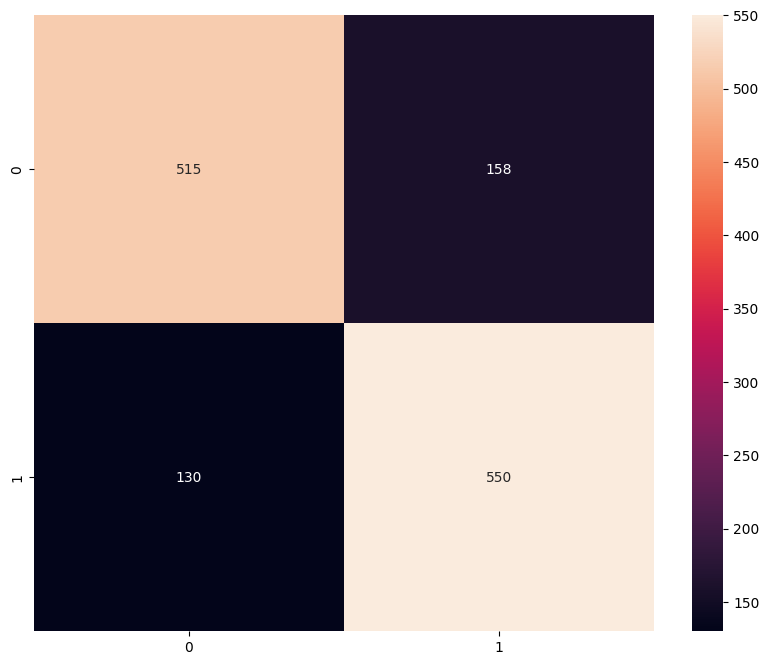

In [131]:
# Сделайте предсказание на тестовых данных
y_pred = pipe.predict(x_test)



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Вычислите оценку точности (accuracy) модели
accuracy = accuracy_score(y_test, y_pred)

# Выведите оценку на экран
print("Accuracy:", accuracy)

predicted_confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(predicted_confusion_matrix, annot=True, fmt='g')

In [109]:
type(y_pred)

numpy.ndarray

In [21]:
import tensorflow as tf
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

class NeuralNetworkTrainer(BaseEstimator, TransformerMixin):
    def __init__(self, epochs=10, batch_size=32, verbose=1):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None
    
    def fit(self, X, y=None):
        input_shape = (X.shape[1],)  # Определите форму входных данных на основе X
        num_classes = len(np.unique(y))  # Количество классов в задаче классификации
        
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(2048, activation='relu', input_shape=input_shape),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.model = model
        return self
    
    def transform(self, X):
        # NeuralNetworkTrainer не изменяет данные, поэтому просто возвращаем X
        return X

    def predict(self, X):
        # Предсказать метки классов для новых данных X
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
        
    def score(self, X, y=None):
        # Оцените производительность модели на данных X и y
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        accuracy = accuracy_score(y, np.argmax(y_pred, axis=1))
        return accuracy

# Остальной код остается без изменений

# Создайте экземпляр нейронной сети
neural_network = NeuralNetworkTrainer()

# Определите сетку параметров для нейронной сети
param_grid = {
    'neural_network__epochs': [10, 20, 30],  # Разные значения числа эпох
    'neural_network__batch_size': [32, 64, 128],  # Разные значения размера пакета
    'neural_network__verbose': [0, 1],  # Разные уровни вывода
}

# Создайте конвейер с нейронной сетью
pipeline = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    ('neural_network', neural_network),
])

# Создайте GridSearchCV объект с конвейером и сеткой параметров
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)

# Запустите поиск по сетке на тренировочных данных
grid_search.fit(x_train, y_train)

# Получите наилучшие параметры
best_params = grid_search.best_params_
print("Наилучшие параметры:", best_params)

2023-09-13 23:24:16.241722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 23:24:16.298989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 23:24:16.302508: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 23:24:16.305022: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 23:24:16.306741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 23:24:16.331666: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-

Epoch 1/10
Epoch 1/10


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/10


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 2s 8ms/step - loss: 0.5240 - accuracy: 0.7347
Epoch 2/10
113/113 [==============================] - 1s 9ms/step - loss: 0.4484 - accuracy: 0.7746
Epoch 3/10
113/113 [==============================] - 1s 9ms/step - loss: 0.4483 - accuracy: 0.7804
Epoch 3/20
113/113 [==============================] - 1s 10ms/step - loss: 0.4120 - accuracy: 0.8034
Epoch 5/10
113/113 [==============================] - 1s 11ms/step - loss: 0.4096 - accuracy: 0.7957
Epoch 5/10
113/113 [==============================] - 1s 10ms/step - loss: 0.4147 - accuracy: 0.8012
Epoch 5/20
113/113 [==============================] - 1s 10ms/step - loss: 0.4083 - accuracy: 0.8057
Epoch 5/20
113/113 [==============================] - 1s 9ms/step - loss: 0.4233 - accuracy: 0.7874
Epoch 5/10
113/113 [==============================] - 1s 11ms/step - loss: 0.4481 - accuracy: 0.7832
Epoch 3/30
113/113 [==============================] - 2s 16ms/step - loss: 0.4012 - accuracy: 0.8109
Epoch

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 7ms/step - loss: 0.3879 - accuracy: 0.8059
Epoch 12/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3855 - accuracy: 0.8093
Epoch 13/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3803 - accuracy: 0.8190
Epoch 13/20
 53/113 [=============>................] - ETA: 0s - loss: 0.3892 - accuracy: 0.8072

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 7ms/step - loss: 0.3868 - accuracy: 0.8073
Epoch 14/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3844 - accuracy: 0.8143
Epoch 14/20
113/113 [==============================] - 1s 9ms/step - loss: 0.3946 - accuracy: 0.8099
Epoch 14/20
113/113 [==============================] - 1s 9ms/step - loss: 0.3857 - accuracy: 0.8181
Epoch 12/30
113/113 [==============================] - 1s 9ms/step - loss: 0.3797 - accuracy: 0.8209
Epoch 15/20
113/113 [==============================] - 3s 8ms/step - loss: 0.5256 - accuracy: 0.7302
Epoch 2/30
113/113 [==============================] - 1s 9ms/step - loss: 0.3934 - accuracy: 0.8068
Epoch 15/20
113/113 [==============================] - 1s 9ms/step - loss: 0.3804 - accuracy: 0.8062
Epoch 16/20
113/113 [==============================] - 1s 9ms/step - loss: 0.3799 - accuracy: 0.8159
Epoch 3/30
Epoch 16/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3800 - accuracy:

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 7ms/step - loss: 0.3983 - accuracy: 0.7960
Epoch 8/30
22/57 [==========>...................] - ETA: 0s0s - loss: 0.4024 - accuracy: 0.80

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 8ms/step - loss: 0.4033 - accuracy: 0.8040
Epoch 8/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3784 - accuracy: 0.8226
Epoch 19/30
113/113 [==============================] - 1s 6ms/step - loss: 0.4000 - accuracy: 0.7979
Epoch 9/30
113/113 [==============================] - 1s 6ms/step - loss: 0.4014 - accuracy: 0.8088
Epoch 9/30
 1/57 [..............................] - ETA: 9s0s - loss: 0.3678 - accuracy: 0.8283

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 6ms/step - loss: 0.3715 - accuracy: 0.8245
Epoch 20/30
 98/113 [=========================>....] - ETA: 0s - loss: 0.3956 - accuracy: 0.8010

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 6ms/step - loss: 0.3925 - accuracy: 0.8059
Epoch 10/30
 20/113 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8188Epoch 1/10


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 6ms/step - loss: 0.4060 - accuracy: 0.7985
Epoch 10/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3725 - accuracy: 0.8248
Epoch 21/30
 66/113 [================>.............] - ETA: 0s - loss: 0.3578 - accuracy: 0.8291

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 7ms/step - loss: 0.3885 - accuracy: 0.8076
Epoch 11/30
113/113 [==============================] - 1s 8ms/step - loss: 0.3997 - accuracy: 0.8065
Epoch 11/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3692 - accuracy: 0.8259
Epoch 22/30
57/57 [==============================] - 1s 9ms/step - loss: 0.4664 - accuracy: 0.7677
Epoch 3/10
113/113 [==============================] - 1s 8ms/step - loss: 0.3894 - accuracy: 0.8070
Epoch 12/30
26/57 [============>.................] - ETA: 0s - loss: 0.4351 - accuracy: 0.788522

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 7ms/step - loss: 0.3967 - accuracy: 0.8099
Epoch 12/30
57/57 [==============================] - 0s 9ms/step - loss: 0.4384 - accuracy: 0.7893
Epoch 4/10
57/57 [==============================] - 3s 11ms/step - loss: 0.5570 - accuracy: 0.7040
Epoch 2/10
113/113 [==============================] - 1s 8ms/step - loss: 0.3856 - accuracy: 0.8109
Epoch 13/30
57/57 [==============================] - 1s 11ms/step - loss: 0.4158 - accuracy: 0.8034
Epoch 5/10
113/113 [==============================] - 1s 8ms/step - loss: 0.3956 - accuracy: 0.8068
Epoch 13/30
113/113 [==============================] - 1s 9ms/step - loss: 0.3665 - accuracy: 0.8237
Epoch 24/30
57/57 [==============================] - 1s 10ms/step - loss: 0.4749 - accuracy: 0.7647
Epoch 3/10
113/113 [==============================] - 1s 10ms/step - loss: 0.3880 - accuracy: 0.8098
Epoch 14/30
113/113 [==============================] - 1s 9ms/step - loss: 0.3952 - accuracy: 0.8063
Epoch 14/3

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 0s 8ms/step - loss: 0.4048 - accuracy: 0.8071
Epoch 9/10
113/113 [==============================] - 1s 7ms/step - loss: 0.3914 - accuracy: 0.8126
Epoch 17/30
57/57 [==============================] - 0s 9ms/step - loss: 0.4215 - accuracy: 0.7968
Epoch 1/20
Epoch 5/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3635 - accuracy: 0.8303
Epoch 28/30
57/57 [==============================] - 0s 8ms/step - loss: 0.4025 - accuracy: 0.8065
Epoch 10/10
113/113 [==============================] - 1s 7ms/step - loss: 0.3776 - accuracy: 0.8112
Epoch 18/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3598 - accuracy: 0.8292
Epoch 29/30
113/113 [==============================] - 1s 6ms/step - loss: 0.3900 - accuracy: 0.8135
Epoch 19/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3797 - accuracy: 0.8131
Epoch 19/30


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 6ms/step - loss: 0.3642 - accuracy: 0.8223
Epoch 30/30
57/57 [==============================] - 0s 8ms/step - loss: 0.3894 - accuracy: 0.8170
Epoch 10/20
113/113 [==============================] - 1s 7ms/step - loss: 0.3868 - accuracy: 0.8088
Epoch 20/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3788 - accuracy: 0.8073
Epoch 20/30
57/57 [==============================] - 0s 7ms/step - loss: 0.4694 - accuracy: 0.7680
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.4817 - accuracy: 0.7600
Epoch 3/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4433 - accuracy: 0.7796
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4527 - accuracy: 0.7797
Epoch 4/20
113/113 [==============================] - 1s 7ms/step - loss: 0.3777 - accuracy: 0.8084
Epoch 21/30
113/113 [==============================] - 1s 7ms/step - loss: 0.3857 - accuracy: 0.8090
Epoch 21/30
57/5

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 9ms/step - loss: 0.4080 - accuracy: 0.8060
Epoch 9/20
57/57 [==============================] - 0s 7ms/step - loss: 0.3730 - accuracy: 0.8251
Epoch 17/20
113/113 [==============================] - 1s 7ms/step - loss: 0.3830 - accuracy: 0.8121
Epoch 24/30
57/57 [==============================] - 0s 5ms/step
Epoch 24/30
57/57 [==============================] - 0s 8ms/step - loss: 0.4012 - accuracy: 0.8104
Epoch 10/20
 51/113 [============>.................] - ETA: 0s - loss: 0.3608 - accuracy: 0.8229

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 6ms/step - loss: 0.3798 - accuracy: 0.8146
Epoch 25/30
57/57 [==============================] - 0s 7ms/step - loss: 0.4006 - accuracy: 0.8038
Epoch 11/20
57/57 [==============================] - 0s 8ms/step - loss: 0.3746 - accuracy: 0.8226
Epoch 19/20
57/57 [==============================] - 0s 6ms/step - loss: 0.3976 - accuracy: 0.8076
Epoch 12/20
Epoch 12/20
57/57 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8234
Epoch 20/20
113/113 [==============================] - 1s 6ms/step - loss: 0.3736 - accuracy: 0.8176
Epoch 26/30
113/113 [==============================] - 1s 6ms/step - loss: 0.3818 - accuracy: 0.8157
Epoch 26/30
57/57 [==============================] - 0s 7ms/step - loss: 0.3852 - accuracy: 0.8048
Epoch 13/20
57/57 [==============================] - 2s 8ms/step - loss: 0.5426 - accuracy: 0.7280
Epoch 2/30
57/57 [==============================] - 0s 8ms/step - loss: 0.3914 - accuracy: 0.8132
Epoch

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


113/113 [==============================] - 1s 7ms/step - loss: 0.3812 - accuracy: 0.8187
Epoch 28/30
55/57 [===========================>..] - ETA: 0s - loss: 0.3841 - accuracy: 0.8060Epoch 3/30
Epoch 1/30
57/57 [==============================] - 1s 9ms/step - loss: 0.4165 - accuracy: 0.8004
Epoch 5/30
 98/113 [=========================>....] - ETA: 0s - loss: 0.3795 - accuracy: 0.8103

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 0s 8ms/step - loss: 0.4337 - accuracy: 0.7865
Epoch 4/30
46/57 [=======================>......] - ETA: 0s - loss: 0.4148 - accuracy: 0.8010Epoch 29/30
Epoch 18/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3792 - accuracy: 0.8135
Epoch 18/20
Epoch 29/30
57/57 [==============================] - 1s 10ms/step - loss: 0.4082 - accuracy: 0.8090
Epoch 6/30
57/57 [==============================] - 0s 8ms/step - loss: 0.3763 - accuracy: 0.8156
Epoch 19/20
57/57 [==============================] - 1s 9ms/step - loss: 0.4193 - accuracy: 0.7926
Epoch 5/30
57/57 [==============================] - 0s 8ms/step - loss: 0.4003 - accuracy: 0.8079
Epoch 7/30
57/57 [==============================] - 1s 9ms/step - loss: 0.3890 - accuracy: 0.8146
Epoch 19/20
113/113 [==============================] - 1s 8ms/step - loss: 0.3671 - accuracy: 0.8165
Epoch 30/30
57/57 [==============================] - 0s 8ms/step - loss: 0.4165 - accuracy: 0.7907
Ep

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 0s 8ms/step - loss: 0.4797 - accuracy: 0.7608
Epoch 3/30
57/57 [==============================] - 1s 10ms/step - loss: 0.3905 - accuracy: 0.8137


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 12/30
57/57 [==============================] - 1s 10ms/step - loss: 0.4515 - accuracy: 0.7808
Epoch 4/30
57/57 [==============================] - 1s 9ms/step - loss: 0.3849 - accuracy: 0.8181
Epoch 13/30
57/57 [==============================] - 1s 9ms/step - loss: 0.3811 - accuracy: 0.8215
Epoch 14/30
 5/57 [=>............................] - ETA: 0s - loss: 0.2938 - accuracy: 0.8875

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 10ms/step - loss: 0.4233 - accuracy: 0.7924
Epoch 6/30
57/57 [==============================] - 0s 8ms/step - loss: 0.3792 - accuracy: 0.8231
Epoch 15/30
57/57 [==============================] - 1s 11ms/step - loss: 0.3855 - accuracy: 0.8087
Epoch 13/30
48/57 [========================>.....] - ETA: 0s - loss: 0.4138 - accuracy: 0.8093

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 10ms/step - loss: 0.4132 - accuracy: 0.8016
Epoch 7/30
57/57 [==============================] - 1s 9ms/step - loss: 0.3788 - accuracy: 0.8215
Epoch 16/30
57/57 [==============================] - 1s 10ms/step - loss: 0.4092 - accuracy: 0.8049
Epoch 8/30
34/57 [================>.............] - ETA: 0s - loss: 0.4149 - accuracy: 0.7909

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 12ms/step - loss: 0.3865 - accuracy: 0.8079
Epoch 15/30
45/57 [======================>.......] - ETA: 0s - loss: 0.5794 - accuracy: 0.7144

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 3s 11ms/step - loss: 0.5719 - accuracy: 0.7108
Epoch 2/10
29/29 [==============================] - 0s 14ms/step - loss: 0.4636 - accuracy: 0.7749
Epoch 4/10
29/29 [==============================] - 3s 13ms/step - loss: 0.5740 - accuracy: 0.7058
Epoch 2/10
57/57 [==============================] - 1s 13ms/step - loss: 0.3772 - accuracy: 0.8231
Epoch 20/30
29/29 [==============================] - 0s 14ms/step - loss: 0.4250 - accuracy: 0.7976
Epoch 6/10
29/29 [==============================] - 3s 17ms/step - loss: 0.5889 - accuracy: 0.6768
Epoch 2/10
29/29 [==============================] - 0s 16ms/step - loss: 0.4657 - accuracy: 0.7696
Epoch 4/10
57/57 [==============================] - 1s 15ms/step - loss: 0.3983 - accuracy: 0.8099
Epoch 12/30
13/29 [============>.................] - ETA: 0s - loss: 0.4392 - accuracy: 0.7933

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 0s 14ms/step - loss: 0.4448 - accuracy: 0.7838
Epoch 5/10
57/57 [==============================] - 1s 15ms/step - loss: 0.3751 - accuracy: 0.8156
Epoch 19/30
57/57 [==============================] - 1s 13ms/step - loss: 0.3988 - accuracy: 0.8024
Epoch 13/30
29/29 [==============================] - 0s 14ms/step - loss: 0.4024 - accuracy: 0.8051
Epoch 9/10
57/57 [==============================] - 1s 13ms/step - loss: 0.3800 - accuracy: 0.8051
Epoch 20/30
29/29 [==============================] - 0s 16ms/step - loss: 0.4341 - accuracy: 0.7866
Epoch 6/10


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 13ms/step - loss: 0.3704 - accuracy: 0.8203
Epoch 23/30
20/29 [===================>..........] - ETA: 0s - loss: 0.3871 - accuracy: 0.8238

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 13ms/step - loss: 0.3934 - accuracy: 0.8143


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 15/30
29/29 [==============================] - 0s 14ms/step - loss: 0.4217 - accuracy: 0.7988
Epoch 8/10
57/57 [==============================] - 1s 13ms/step - loss: 0.3710 - accuracy: 0.8245
Epoch 24/30
29/29 [==============================] - 0s 16ms/step - loss: 0.4000 - accuracy: 0.8043
Epoch 10/10
57/57 [==============================] - 1s 13ms/step - loss: 0.3941 - accuracy: 0.8099
Epoch 16/30
57/57 [==============================] - 1s 13ms/step - loss: 0.3759 - accuracy: 0.8051
Epoch 22/30
57/57 [==============================] - 1s 13ms/step - loss: 0.3904 - accuracy: 0.8160
Epoch 17/30
57/57 [==============================] - 1s 10ms/step - loss: 0.3672 - accuracy: 0.8278
Epoch 26/30
38/57 [===================>..........] - ETA: 0s - loss: 0.3723 - accuracy: 0.8232

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 11ms/step - loss: 0.3875 - accuracy: 0.8126
Epoch 2/20
Epoch 18/30
57/57 [==============================] - 1s 11ms/step - loss: 0.3872 - accuracy: 0.8157
Epoch 19/30
57/57 [==============================] - 1s 13ms/step - loss: 0.3743 - accuracy: 0.8148
Epoch 25/30
57/57 [==============================] - 1s 14ms/step - loss: 0.3664 - accuracy: 0.8292
Epoch 28/30


/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 0s 16ms/step - loss: 0.5083 - accuracy: 0.7400
Epoch 3/20
47/57 [=======================>......] - ETA: 0s - loss: 0.3929 - accuracy: 0.8082

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


29/29 [==============================] - 1s 18ms/step - loss: 0.4147 - accuracy: 0.8054
Epoch 7/20
29/29 [==============================] - 0s 13ms/step - loss: 0.4330 - accuracy: 0.7888
Epoch 6/20
57/57 [==============================] - 1s 15ms/step - loss: 0.3682 - accuracy: 0.8140
Epoch 27/30
24/29 [=======================>......] - ETA: 0s - loss: 0.4272 - accuracy: 0.7917Epoch 8/20
Epoch 6/20
29/29 [==============================] - 0s 14ms/step - loss: 0.4210 - accuracy: 0.7974
Epoch 7/20
57/57 [==============================] - 1s 16ms/step - loss: 0.3882 - accuracy: 0.8101
Epoch 22/30
29/29 [==============================] - 0s 14ms/step - loss: 0.3991 - accuracy: 0.8137
Epoch 9/20
29/29 [==============================] - 1s 18ms/step - loss: 0.4185 - accuracy: 0.7971
Epoch 7/20
57/57 [==============================] - 1s 16ms/step - loss: 0.3754 - accuracy: 0.8131
Epoch 28/30
29/29 [==============================] - 0s 14ms/step - loss: 0.3977 - accuracy: 0.8062
Epoch 10/20
2

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


57/57 [==============================] - 1s 9ms/step
Epoch 9/20
57/57 [==============================] - 1s 16ms/step - loss: 0.3704 - accuracy: 0.8201
Epoch 29/30
29/29 [==============================] - 0s 14ms/step - loss: 0.3970 - accuracy: 0.8032
Epoch 11/20
57/57 [==============================] - 1s 13ms/step - loss: 0.3719 - accuracy: 0.8170
Epoch 30/30
29/29 [==============================] - 0s 15ms/step - loss: 0.3888 - accuracy: 0.8129
Epoch 14/20
29/29 [==============================] - 0s 12ms/step - loss: 0.3842 - accuracy: 0.8212
Epoch 15/20
29/29 [==============================] - 0s 14ms/step - loss: 0.4919 - accuracy: 0.7555
Epoch 3/30
29/29 [==============================] - 0s 14ms/step - loss: 0.3924 - accuracy: 0.8068
Epoch 13/20
29/29 [==============================] - 0s 14ms/step - loss: 0.3826 - accuracy: 0.8245
Epoch 16/20
26/29 [=========================>....] - ETA: 0s - loss: 0.5750 - accuracy: 0.7040Epoch 15/20
Epoch 14/20
29/29 [========================

/home/gea/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Наилучшие параметры: {'neural_network__batch_size': 128, 'neural_network__epochs': 20, 'neural_network__verbose': 0}


In [23]:
# Сделайте предсказание на тестовых данных
y_pred = pipe.predict(x_test)
from sklearn.metrics import accuracy_score

# Вычислите оценку точности (accuracy) модели
accuracy = accuracy_score(y_test, y_pred)

# Выведите оценку на экран
print("Accuracy:", accuracy)

43/43 [==============================] - 0s 3ms/step
Accuracy: 0.7945306725794531
